### section 1 import data and process

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import raw data
Meta_data=pd.read_excel('/kaggle/input/metabolites-1/Meta screening_label.xlsx')

In [5]:
# check data

print(Meta_data)
print(type(Meta_data))

        Metabolites  Donor 1 ctrl  Donor 2 ctrl  Donor 3 ctrl  Donor 1 C2  \
0         Glycolate         19.74         29.82         14.33       11.84   
1           Lactate      19315.89      22335.24      35606.94    19070.54   
2        Glyoxylate         18.95         26.20         19.49       17.72   
3         Hippurate          0.00          0.00          0.00        0.00   
4          Pyruvate        230.18        377.45        640.00      322.18   
5          Fumarate        314.88        565.50        412.08      322.63   
6         Succinate        117.48        161.19        112.76      108.81   
7            Malate        384.03        694.93        502.49      420.30   
8   a-Ketoglutarate          8.42         20.07         15.79       11.89   
9           citrate        947.05       1461.84        854.60     1188.48   
10       Isocitrate          7.52         15.30         13.26       10.23   

    Donor 2 C2  Donor 3 C2  
0         7.72       12.87  
1     13436.19   

In [34]:
#get the data of the first two donors
df_meta=Meta_data[['Metabolites','Donor 1 ctrl','Donor 2 ctrl','Donor 1 C2','Donor 2 C2']]
df_meta

,Metabolites,Donor 1 ctrl,Donor 2 ctrl,Donor 1 C2,Donor 2 C2
0,Glycolate,19.74,29.82,11.84,7.72
1,Lactate,19315.89,22335.24,19070.54,13436.19
2,Glyoxylate,18.95,26.20,17.72,25.73
3,Hippurate,0.00,0.00,0.00,0.00
4,Pyruvate,230.18,377.45,322.18,428.36
5,Fumarate,314.88,565.50,322.63,366.17
6,Succinate,117.48,161.19,108.81,105.78
7,Malate,384.03,694.93,420.30,583.68
8,a-Ketoglutarate,8.42,20.07,11.89,22.60
9,citrate,947.05,1461.84,1188.48,1330.29


In [35]:
#remove hippurate_no readings
df_meta.drop(3, inplace=True)
df_meta

/tmp/ipykernel_36/2078671891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta.drop(3, inplace=True)


,Metabolites,Donor 1 ctrl,Donor 2 ctrl,Donor 1 C2,Donor 2 C2
0,Glycolate,19.74,29.82,11.84,7.72
1,Lactate,19315.89,22335.24,19070.54,13436.19
2,Glyoxylate,18.95,26.20,17.72,25.73
4,Pyruvate,230.18,377.45,322.18,428.36
5,Fumarate,314.88,565.50,322.63,366.17
6,Succinate,117.48,161.19,108.81,105.78
7,Malate,384.03,694.93,420.30,583.68
8,a-Ketoglutarate,8.42,20.07,11.89,22.60
9,citrate,947.05,1461.84,1188.48,1330.29
10,Isocitrate,7.52,15.30,10.23,23.36


### section 2 Heatmap generation. To correct baseline difference between donors, raw readings were first scaled with median centering. Heatmap was ploted to show z score.

In [8]:
##Median center the data to correct the baseline difference between the donors
# calculate median within each donor
df_median=pd.DataFrame()
gru_7_median=df_meta[['Donor 1 ctrl','Donor 1 C2']].median(axis=1)
gru_10_median=df_meta[['Donor 2 ctrl','Donor 2 C2']].median(axis=1)
df_median['Donor 1 ctrl']=gru_7_median
df_median['Donor 2 ctrl']=gru_10_median
df_median['Donor 1 C2']=gru_7_median
df_median['Donor 2 C2']=gru_10_median
df_median

,Donor 1 ctrl,Donor 2 ctrl,Donor 1 C2,Donor 2 C2
0,15.790,18.770,15.790,18.770
1,19193.215,17885.715,19193.215,17885.715
2,18.335,25.965,18.335,25.965
4,276.180,402.905,276.180,402.905
5,318.755,465.835,318.755,465.835
6,113.145,133.485,113.145,133.485
7,402.165,639.305,402.165,639.305
8,10.155,21.335,10.155,21.335
9,1067.765,1396.065,1067.765,1396.065
10,8.875,19.330,8.875,19.330


In [9]:
#subtract the median to get median centered value

df_meta_1=df_meta.drop('Metabolites', axis=1)
df_mediancentered=df_meta_1.subtract(df_median)
df_mediancentered

,Donor 1 ctrl,Donor 2 ctrl,Donor 1 C2,Donor 2 C2
0,3.950,11.050,-3.950,-11.050
1,122.675,4449.525,-122.675,-4449.525
2,0.615,0.235,-0.615,-0.235
4,-46.000,-25.455,46.000,25.455
5,-3.875,99.665,3.875,-99.665
6,4.335,27.705,-4.335,-27.705
7,-18.135,55.625,18.135,-55.625
8,-1.735,-1.265,1.735,1.265
9,-120.715,65.775,120.715,-65.775
10,-1.355,-4.030,1.355,4.030


In [10]:
#calculate the z score of median centered data
row_mean = df_mediancentered.mean(axis=1)
row_std = df_mediancentered.std(axis=1)

df_zscore=(df_mediancentered.sub(row_mean, axis=0)).div(row_std, axis=0)
# assign index and re order based on request
df_zscore.index=df_meta['Metabolites']
new_order=['Succinate','a-Ketoglutarate','Glycolate','Lactate','Glyoxylate','Pyruvate', 'Fumarate','Malate','citrate','Isocitrate']
df_zscore=df_zscore.loc[new_order]
df_zscore

,Donor 1 ctrl,Donor 2 ctrl,Donor 1 C2,Donor 2 C2
Metabolites,,,,
Succinate,0.189332,1.210022,-0.189332,-1.210022
a-Ketoglutarate,-0.989631,-0.721547,0.989631,0.721547
Glycolate,0.412257,1.153275,-0.412257,-1.153275
Lactate,0.033754,1.224280,-0.033754,-1.224280
Glyoxylate,1.144066,0.437164,-1.144066,-0.437164
Pyruvate,-1.071613,-0.592998,1.071613,0.592998
Fumarate,-0.047582,1.223820,0.047582,-1.223820
Malate,-0.379628,1.164424,0.379628,-1.164424
citrate,-1.075458,0.585994,1.075458,-0.585994


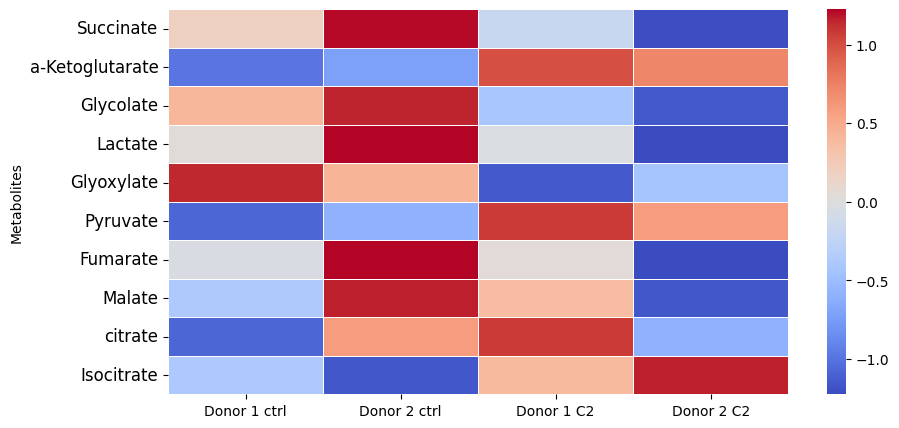

In [11]:
#generate heatmap of zscore
plt.figure(figsize=(10, 5))
sns.heatmap(df_zscore, annot=False, cmap='coolwarm', linewidths=0.5)
plt.yticks(fontsize=12)
plt.show()


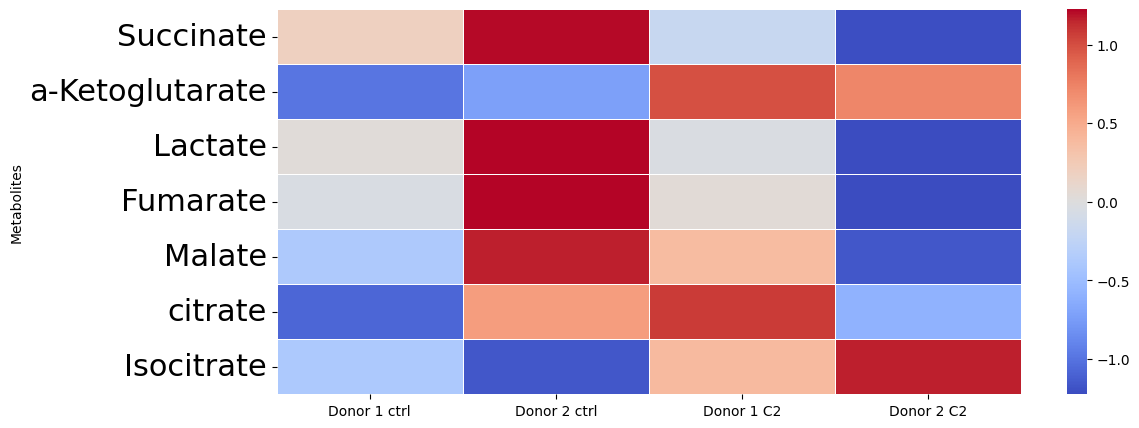

In [12]:
#remove some metabolites and re-do heatmap
df_zscore_1=df_zscore.loc[['Succinate','a-Ketoglutarate','Lactate', 'Fumarate','Malate','citrate','Isocitrate']]
plt.figure(figsize=(12, 5))
sns.heatmap(df_zscore_1, annot=False, cmap='coolwarm', linewidths=0.5)
plt.yticks(fontsize=22)

plt.savefig('/kaggle/working/heatmap_meta.png',bbox_inches='tight')
plt.show()

### Section 3, stastic analysis. I tried two different method,1) compare raw readings directly, with paired t test; 2) normalize data in each donor with log2 fold change (treatment normalize to control), with unpaired t test

In [ ]:
## calculate p value, paired student t test
from scipy.stats import ttest_rel
p_value=[]
t_stat_list=[]
for i in df_meta.index:
    df_test=df_meta.loc[i]
    df_pcaculation=pd.DataFrame()
    df_pcaculation['ctrl']=[df_test[1], df_test[2]]
    df_pcaculation['C2']=[df_test[3], df_test[4]]
   
    t_stat, p_val = ttest_rel(df_pcaculation['ctrl'], df_pcaculation['C2'])
    p_value.append(p_val)
    t_stat_list.append(t_stat)
print(p_value)
print(t_stat_list)


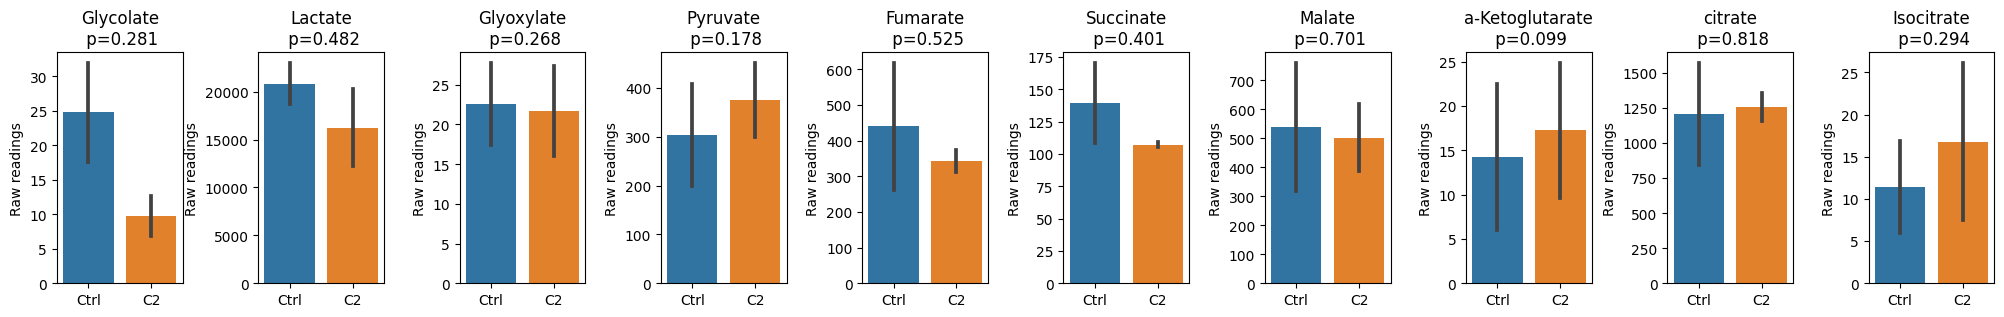

In [36]:
# draw bar graph with raw readings to show mean and std, and p values
## reset index
df_meta=df_meta.reset_index()
df_meta
## draw bar graph
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=1, ncols=10, sharex=True, figsize=(25, 3))
ax_list=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
fig.subplots_adjust(wspace=0.6)
for i, axs in enumerate(ax_list):
    df_use=pd.DataFrame()
    S_use=df_meta.loc[i]
    df_use['Values']=S_use[2:6].values
    df_use['Condtion']=['Ctrl','Ctrl','C2','C2']
    sns.barplot(data=df_use, x='Condtion',y='Values',estimator='mean', errorbar=('sd'), ax=axs)
    axs.set_title(label=df_meta.loc[i, 'Metabolites']+'\n p='+str(round(p_value[i], 3)))
    axs.set_xlabel('')
    axs.set_ylabel('Raw readings')

plt.savefig('/kaggle/working/raw_bargraph.png',bbox_inches='tight')    
plt.show()    




In [47]:
# Now try to calculate the log2 fold change in one graph
## get the log2 fold change 
D1_log=np.log2(df_meta['Donor 1 C2']/df_meta['Donor 1 ctrl'])
D2_log=np.log2(df_meta['Donor 2 C2']/df_meta['Donor 2 ctrl'])
df_log=pd.DataFrame()

df_log['Value']=pd.concat([D1_log, D2_log], axis=0, ignore_index=True)


In [51]:
df_log['Metabolites'] = pd.concat([df_meta['Metabolites'], df_meta['Metabolites']], axis=0, ignore_index=True)
df_log

,Value,Metabolites
0,-0.737453,Glycolate
1,-0.018442,Lactate
2,-0.096819,Glyoxylate
3,0.485104,Pyruvate
4,0.035078,Fumarate
5,-0.110604,Succinate
6,0.130200,Malate
7,0.497857,a-Ketoglutarate
8,0.327605,citrate
9,0.444002,Isocitrate


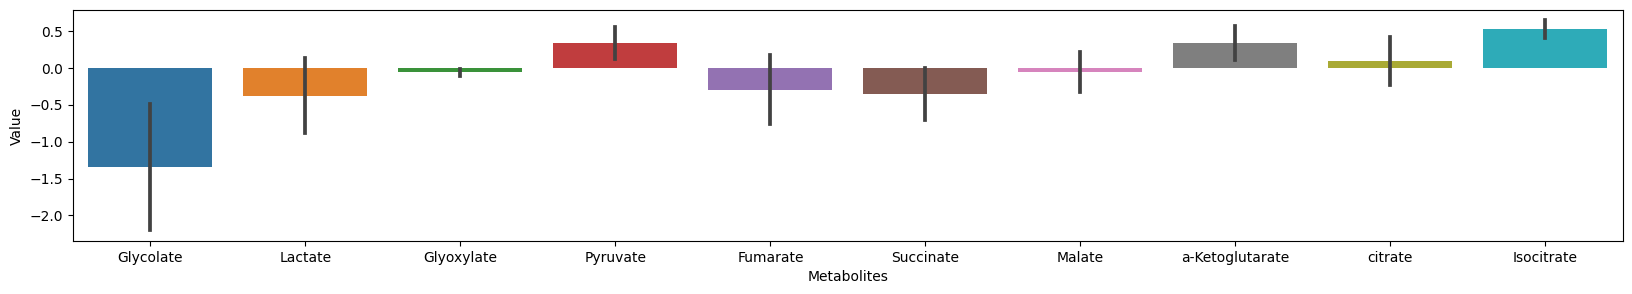

In [53]:
## this is just a quick test
# plot the bar graph of log fold change_test
plt.figure(figsize=(20, 3))

sns.barplot(data=df_log, x='Metabolites',y='Value',estimator='mean', errorbar=('sd'))

plt.show()    

In [61]:
#Calculate the p values after log2 scaling
import scipy.stats as stats
t_stat_log_list=[]
pvalue_log_list=[]
for i in range(0,10):
    df_p_log=pd.DataFrame()
    df_p_log['C2']=[D1_log[i],D2_log[i]]
    df_p_log['ctrl']=[0,0]
    t_stat_log, p_value_log=stats.ttest_ind(df_p_log['ctrl'], df_p_log['C2'])
    pvalue_log_list.append(p_value_log)
    t_stat_log_list.append(t_stat_log)
print(pvalue_log_list)
    

[0.15694982791809248, 0.40329348419707733, 0.22421359913852612, 0.15807342174459502, 0.46564391009894324, 0.28531974627242707, 0.7805345965983067, 0.17700052665692884, 0.7195754218994461, 0.024037068262057478]


In [65]:
# assign the p value to original data frame, and re_order based on request
df_meta['p_log']=pvalue_log_list
order=['Glycolate','Lactate','Succinate','Fumarate','Glyoxylate','Malate','citrate','a-Ketoglutarate','Pyruvate','Isocitrate']

df_meta['Metabolites'] = pd.Categorical(df_meta['Metabolites'], categories=order, ordered=True)

# Reorder the DataFrame based on the 'Metabolites' column
df_meta_order = df_meta.sort_values(by='Metabolites')



In [68]:
#get re-ordered p values
p_vlue_plot=df_meta_order['p_log']
p_vlue_plot

0    0.156950
1    0.403293
5    0.285320
4    0.465644
2    0.224214
6    0.780535
8    0.719575
7    0.177001
3    0.158073
9    0.024037
Name: p_log, dtype: float64

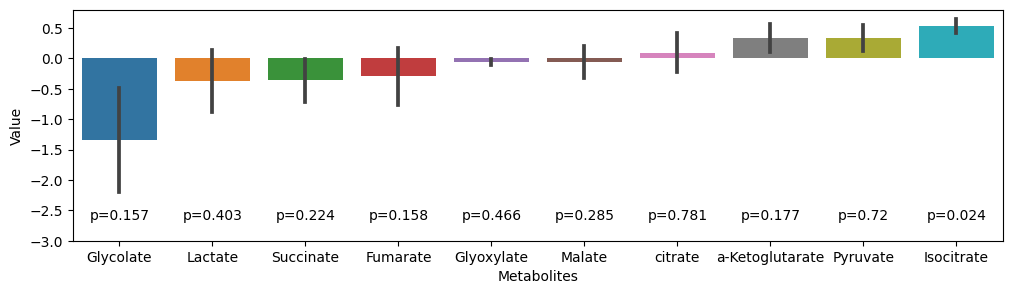

In [72]:
# plot the bar graph of log fold change_final
# reset order
order=['Glycolate','Lactate','Succinate','Fumarate','Glyoxylate','Malate','citrate','a-Ketoglutarate','Pyruvate','Isocitrate']
plt.figure(figsize=(12, 3))

ax=sns.barplot(data=df_log, x='Metabolites',y='Value',estimator='mean', errorbar=('sd'), order=order)
for i, bar in enumerate(ax.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation on top of the bar
    ax.text(bar.get_x() + bar.get_width() / 2., -2.7, 'p='+str(round(p_vlue_plot[i], 3)), ha='center', va='bottom')
plt.ylim(-3.0, 0.8)    
plt.show() 

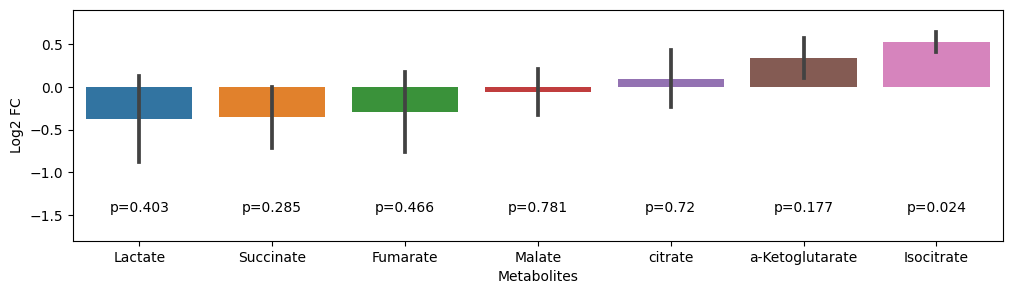

In [81]:
# redo with the metabolites of interest
order_1=['Lactate','Succinate','Fumarate','Malate','citrate','a-Ketoglutarate','Isocitrate']
P_value_selected=p_vlue_plot.iloc[[1,2,3,5,6,7,9]]
P_value_selected_reset = P_value_selected.reset_index(drop=True)
plt.figure(figsize=(12, 3))

ax=sns.barplot(data=df_log, x='Metabolites',y='Value',estimator='mean', errorbar=('sd'), order=order_1)
for i, bar in enumerate(ax.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation on top of the bar
    ax.text(bar.get_x() + bar.get_width() / 2., -1.5, 'p='+str(round(P_value_selected_reset[i], 3)), ha='center', va='bottom')
plt.ylim(-1.8, 0.9) 
plt.ylabel('Log2 FC')
plt.savefig('/kaggle/working/Log2_FC.png',bbox_inches='tight')    

plt.show() 